# Spectrum (Line Plot) Benchmark 
This notebook is used for testing and benchmarking performance of spectrum plot.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
from time import sleep
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from model.message_topic import MessageTopic
from model.protocol import Protocol
import mock_payload_generator as payload_generator
import utils
from producer import Producer


In [ ]:
producer = Producer()


## Payload Size

In [4]:
channels = list(range(25000, 610000, 25000))

In [6]:
json_payload_size = []
protobuf_payload_size = []
unit = "MB"

for _, channel in enumerate(channels):
    _, size = payload_generator.spectrum_json(channel)
    json_payload_size.append(utils.convert_bytes(size, unit))

    _, size = payload_generator.spectrum_protobuf(channel)
    protobuf_payload_size.append(utils.convert_bytes(size, unit))

### Plot Payload Size

In [7]:
_df = []

for idx, channel in enumerate(channels):
    if len(protobuf_payload_size) > 0:
        d1 = {
            "Channel": channel,
            "Size": protobuf_payload_size[idx],
            "Encoding": "ProtoBuf",
        }
        _df.append(d1)

    if len(json_payload_size) > 0:
        d2 = {
            "Channel": channel,
            "Size": json_payload_size[idx],
            "Encoding": "JSON",
        }
        _df.append(d2)

df_size = pd.DataFrame(_df)


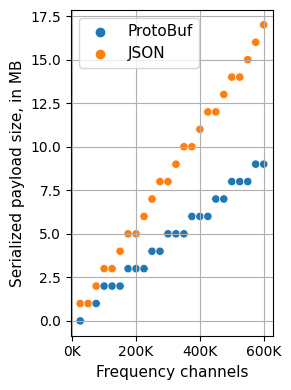

In [8]:
fig = plt.figure(figsize=(3, 4), tight_layout=True)

p = sns.scatterplot(data=df_size, x="Channel", y="Size", hue="Encoding")

p.set_xlabel("Frequency channels", fontsize=11)
p.set_ylabel(f"Serialized payload size, in {unit}", fontsize=11)

# Format the xticks
xlabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_xticks()/1000]
p.set_xticklabels(xlabels)

plt.grid()
plt.legend(fontsize=11)

plt.show()

## Payload Deserialization and Transmission

Send each payloads to the browser 10 times and collect deserialisation, and transmisssion time in the browser. 

In [17]:
num_iter = 10

### ProtoBuf

In [ ]:
await producer.start()

for idx, channel in enumerate(channels):
    for it in range(num_iter):
        sleep(3)
        # print(f"idx: {idx}, channel: {channel}, it: {it}")
        payload, _ = payload_generator.spectrum_protobuf(channel)
        await producer.produce(payload, f'{Protocol.PROTOBUF}_{MessageTopic.SPECTRUM}')

await producer.stop()
print("Complete!")

Protobuf decoding time - copy data from browser.

In [63]:
# This data is captured in the browser. 
# We should save the data in better way.


# channels = list(range(25000, 610000, 25000))
# num_iter = 10

protobuf_decoding_time = [
   9.300000000745058,
    8,
    3,
    3,
    3.199999999254942,
    8.600000001490116,
    9.099999999627471,
    9.300000000745058,
    9.300000000745058,
    3.200000001117587,
    7.099999999627471,
    6.299999998882413,
    7.400000000372529,
    6.800000000745058,
    6.599999999627471,
    5.599999999627471,
    5.699999999254942,
    5.800000000745058,
    5.600000001490116,
    5.699999999254942,
    9,
    9.800000000745058,
    14.700000001117587,
    9.199999999254942,
    9.900000000372529,
    8.799999998882413,
    9,
    9.5,
    8.699999999254942,
    9.5,
    12.599999999627471,
    13.300000000745058,
    12.700000001117587,
    13,
    13.099999999627471,
    12.599999999627471,
    12.299999998882413,
    13.5,
    12.699999999254942,
    13.199999999254942,
    16.800000000745058,
    16.600000001490116,
    16.40000000037253,
    16.600000001490116,
    16.700000001117587,
    16.300000000745058,
    16.40000000037253,
    16.300000000745058,
    16.90000000037253,
    16.59999999962747,
    18.90000000037253,
    18.200000001117587,
    18.700000001117587,
    18.09999999962747,
    18,
    18.200000001117587,
    21.09999999962747,
    18.40000000037253,
    19.59999999962747,
    18.5,
    22.700000001117587,
    23.299999998882413,
    25,
    23,
    22.5,
    22.90000000037253,
    22.59999999962747,
    22.700000001117587,
    23.40000000037253,
    22.40000000037253,
    30.800000000745058,
    27.40000000037253,
    25.09999999962747,
    25.199999999254942,
    25.200000001117587,
    26.899999998509884,
    26.09999999962747,
    25.59999999962747,
    25.399999998509884,
    25.800000000745058,
    30.59999999962747,
    29.300000000745058,
    27.59999999962747,
    28.09999999962747,
    27.90000000037253,
    28.200000001117587,
    28.299999998882413,
    28.09999999962747,
    27.600000001490116,
    29.40000000037253,
    34,
    31.699999999254942,
    30.40000000037253,
    30.90000000037253,
    30.700000001117587,
    31.90000000037253,
    29.199999999254942,
    29.40000000037253,
    29.5,
    31.300000000745058,
    44.40000000037253,
    36.19999999925494,
    38,
    37.30000000074506,
    37.40000000037253,
    37.5,
    36.90000000037253,
    37.399999998509884,
    37.30000000074506,
    37.59999999962747,
    43.90000000037253,
    39.90000000037253,
    41,
    38.79999999888241,
    39.59999999962747,
    38,
    43.5,
    39,
    40.30000000074506,
    38.19999999925494,
    44,
    40,
    39.80000000074506,
    47,
    41.20000000111759,
    42.20000000111759,
    39.79999999888241,
    41.30000000074506,
    41,
    42.59999999962747,
    47.69999999925494,
    44.40000000037253,
    44.90000000037253,
    45.5,
    44,
    44,
    44.70000000111759,
    44.59999999962747,
    46.80000000074506,
    45.29999999888241,
    62.5,
    45.59999999962747,
    49.19999999925494,
    49.5,
    45.5,
    46.79999999888241,
    46.69999999925494,
    48.19999999925494,
    49.40000000037253,
    47.5,
    60.79999999888241,
    53.70000000111759,
    53.40000000037253,
    51.59999999962747,
    54.29999999888241,
    52.80000000074506,
    53.09999999962747,
    54.30000000074506,
    54.100000001490116,
    54,
    59.399999998509884,
    56.30000000074506,
    56.59999999962747,
    55.80000000074506,
    59.30000000074506,
    58.90000000037253,
    60.5,
    58.69999999925494,
    57.80000000074506,
    58,
    61.5,
    61.40000000037253,
    64.20000000111759,
    74.10000000149012,
    60.79999999888241,
    64.59999999962747,
    63.90000000037253,
    70.30000000074506,
    63.100000001490116,
    60.19999999925494,
    62.70000000111759,
    62.20000000111759,
    63.59999999962747,
    61.20000000111759,
    65.40000000037253,
    61.69999999925494,
    61.09999999962747,
    60.40000000037253,
    62.90000000037253,
    62.5,
    66.40000000037253,
    63.40000000037253,
    64.70000000111759,
    65.40000000037253,
    62.59999999962747,
    66,
    63.30000000074506,
    64.90000000037253,
    66.19999999925494,
    63.80000000074506,
    73.70000000111759,
    67.19999999925494,
    65.40000000037253,
    64.5,
    68.09999999962747,
    66.59999999962747,
    65.30000000074506,
    65.5,
    77.29999999888241,
    65.59999999962747,
    68.30000000074506,
    67.79999999888241,
    66.70000000111759,
    67.59999999962747,
    70.29999999888241,
    67.59999999962747,
    69.10000000149012,
    68.59999999962747,
    68.30000000074506,
    68,
    74.30000000074506,
    74.90000000037253,
    70.90000000037253,
    72.20000000111759,
    70.5,
    69.79999999888241,
    71.19999999925494,
    71.80000000074506,
    69.90000000037253,
    70.80000000074506,
    93.40000000037253,
    83.5,
    80.59999999962747,
    78.40000000037253,
    81.90000000037253,
    81.5,
    80.80000000074506,
    85.80000000074506,
    86.20000000111759,
    79.29999999888241,
] 

Protobuf transmission time - copy data from browser.

In [64]:
# This data is captured in the browser. 
# We should save the data in better way.

protobuf_transmission_time = [
    98,
    117,
    96,
    94,
    127,
    96,
    95,
    94,
    95,
    95,
    190,
    191,
    207,
    191,
    190,
    192,
    191,
    193,
    191,
    204,
    281,
    282,
    294,
    282,
    299,
    296,
    294,
    296,
    294,
    283,
    373,
    378,
    381,
    375,
    375,
    376,
    373,
    374,
    371,
    371,
    468,
    462,
    464,
    464,
    463,
    468,
    461,
    464,
    461,
    460,
    555,
    553,
    551,
    550,
    550,
    552,
    552,
    555,
    564,
    556,
    638,
    639,
    643,
    646,
    648,
    639,
    641,
    641,
    642,
    648,
    729,
    732,
    730,
    727,
    727,
    727,
    731,
    726,
    729,
    727,
    818,
    817,
    815,
    815,
    822,
    823,
    813,
    826,
    824,
    821,
    911,
    905,
    906,
    902,
    906,
    903,
    904,
    921,
    919,
    899,
    1006,
    997,
    990,
    998,
    999,
    992,
    984,
    993,
    993,
    996,
    1094,
    1080,
    1083,
    1083,
    1082,
    1084,
    1089,
    1077,
    1084,
    1080,
    1175,
    1172,
    1176,
    1174,
    1174,
    1171,
    1177,
    1174,
    1173,
    1175,
    1279,
    1255,
    1266,
    1263,
    1268,
    1269,
    1264,
    1267,
    1262,
    1278,
    1348,
    1356,
    1362,
    1342,
    1350,
    1347,
    1362,
    1357,
    1353,
    1346,
    1442,
    1438,
    1442,
    1443,
    1441,
    1451,
    1435,
    1457,
    1449,
    1468,
    1552,
    1540,
    1536,
    1533,
    1529,
    1535,
    1533,
    1532,
    1543,
    1533,
    1635,
    1640,
    1634,
    1632,
    1618,
    1624,
    1630,
    1613,
    1630,
    1628,
    1736,
    1721,
    1706,
    1714,
    1716,
    1708,
    1719,
    1721,
    1716,
    1710,
    1816,
    1808,
    1813,
    1813,
    1807,
    1805,
    1806,
    1797,
    1816,
    1799,
    1896,
    1929,
    1895,
    1896,
    1896,
    1894,
    1888,
    1886,
    1893,
    1892,
    1988,
    1992,
    1998,
    2031,
    2000,
    2028,
    2013,
    1993,
    2023,
    2009,
    2139,
    2106,
    2098,
    2106,
    2088,
    2095,
    2086,
    2085,
    2088,
    2113,
    2194,
    2188,
    2197,
    2187,
    2184,
    2180,
    2183,
    2183,
    2177,
    2197
]


### JSON

In [ ]:
await producer.start()

for idx, channel in enumerate(channels):
    for it in range(num_iter):
        sleep(3)
        # print(f"idx: {idx}, channel: {channel}, it: {it}")
        payload, _ = payload_generator.spectrum_json(channel)
        await producer.produce(payload, f'{Protocol.JSON}_{MessageTopic.SPECTRUM}')

await producer.stop()
print("Complete!")

JSON decoding time - copy data from browser.

In [66]:
# This data is captured in the browser. 
# We should save the data in better way.

json_decoding_time = [
      4.599999997764826,
    3.399999998509884,
    3.600000001490116,
    3.599999997764826,
    3.800000000745058,
    3.699999999254942,
    3.5,
    3.5,
    3.399999998509884,
    3.699999999254942,
    6.800000000745058,
    7.199999999254942,
    7.400000002235174,
    6.900000002235174,
    7.800000000745058,
    6.699999999254942,
    7,
    7.099999997764826,
    7.300000000745058,
    7.199999999254942,
    11.399999998509884,
    11.300000000745058,
    12.300000000745058,
    12.299999997019768,
    10.900000002235174,
    11,
    11.600000001490116,
    10.800000000745058,
    10.5,
    10.599999997764826,
    17.900000002235174,
    15.699999999254942,
    14.700000002980232,
    14.600000001490116,
    15,
    15,
    14.600000001490116,
    14.5,
    14.800000000745058,
    14.400000002235174,
    17.600000001490116,
    17.5,
    17.800000000745058,
    18.300000000745058,
    18.099999997764826,
    17.800000000745058,
    18.300000000745058,
    17.800000000745058,
    17.699999999254942,
    17.600000001490116,
    21.399999998509884,
    26.400000002235174,
    25.200000002980232,
    24,
    24.699999999254942,
    21.300000000745058,
    23.5,
    20.900000002235174,
    24.100000001490116,
    23.899999998509884,
    26.899999998509884,
    26.599999997764826,
    26.699999999254942,
    25.199999999254942,
    25.099999997764826,
    25,
    25,
    26.100000001490116,
    27.100000001490116,
    24.600000001490116,
    28.600000001490116,
    40.30000000074506,
    32,
    28.099999997764826,
    29.400000002235174,
    29.600000001490116,
    28.900000002235174,
    29.300000000745058,
    28.199999999254942,
    28.400000002235174,
    37.30000000074506,
    33.600000001490116,
    38.100000001490116,
    33.900000002235174,
    37.69999999925494,
    34,
    39.19999999925494,
    34.899999998509884,
    37.80000000074506,
    32.399999998509884,
    44.099999997764826,
    38.20000000298023,
    44.29999999701977,
    39,
    44.100000001490116,
    36.600000001490116,
    44.5,
    37.399999998509884,
    41.400000002235174,
    37.69999999925494,
    48.80000000074506,
    51.30000000074506,
    45.599999997764826,
    45.79999999701977,
    39.80000000074506,
    46.599999997764826,
    41.400000002235174,
    46.19999999925494,
    39.899999998509884,
    47.30000000074506,
    60.20000000298023,
    48.899999998509884,
    49.29999999701977,
    51.099999997764826,
    55.900000002235174,
    47.099999997764826,
    54.30000000074506,
    48,
    54.30000000074506,
    47.599999997764826,
    60.69999999925494,
    49.19999999925494,
    52.599999997764826,
    48,
    51,
    47.899999998509884,
    53.399999998509884,
    48.600000001490116,
    52.70000000298023,
    50.099999997764826,
    66.5,
    63.100000001490116,
    57.899999998509884,
    61.69999999925494,
    57.600000001490116,
    61.100000001490116,
    59.79999999701977,
    64.10000000149012,
    63.80000000074506,
    55.5,
    70.10000000149012,
    67.19999999925494,
    69.5,
    67.80000000074506,
    67.79999999701977,
    66.80000000074506,
    67.19999999925494,
    67.69999999925494,
    69.5,
    67.60000000149012,
    73.69999999925494,
    67.89999999850988,
    70.30000000074506,
    68.5,
    72.29999999701977,
    67.90000000223517,
    70,
    68.90000000223517,
    70.39999999850988,
    69.5,
    106,
    76.10000000149012,
    77.39999999850988,
    81.39999999850988,
    82.19999999925494,
    79.80000000074506,
    83.30000000074506,
    80.80000000074506,
    82.5,
    81.09999999776483,
    101.39999999850988,
    81.5,
    83.89999999850988,
    86.30000000074506,
    84,
    83.39999999850988,
    82.69999999925494,
    84.39999999850988,
    81.69999999925494,
    84.59999999776483,
    110.60000000149012,
    76.19999999925494,
    84.20000000298023,
    84.39999999850988,
    87.60000000149012,
    84.40000000223517,
    85.39999999850988,
    87.30000000074506,
    82.80000000074506,
    85,
    119,
    85.90000000223517,
    85.89999999850988,
    86.10000000149012,
    86.60000000149012,
    88.19999999925494,
    86.70000000298023,
    88.90000000223517,
    84.19999999925494,
    86.30000000074506,
    150.69999999925494,
    90.59999999776483,
    88,
    89.80000000074506,
    89,
    90.39999999850988,
    88.20000000298023,
    91.19999999925494,
    88.39999999850988,
    89.10000000149012,
    139.80000000074506,
    101.29999999701977,
    90.69999999925494,
    90.20000000298023,
    91.30000000074506,
    90.09999999776483,
    91.69999999925494,
    88.59999999776483,
    89.40000000223517,
    91.60000000149012,
    150.19999999925494,
    99.5,
    103.30000000074506,
    102.69999999925494,
    102.80000000074506,
    102.89999999850988,
    101.89999999850988,
    101.09999999776483,
    102.10000000149012,
    108.19999999925494,
    159.09999999776483,
    103,
    105.19999999925494,
    102.60000000149012,
    103.69999999925494,
    106.90000000223517,
    102.10000000149012,
    103.69999999925494,
    127.30000000074506,
    104.09999999776483,
]

JSON transmission time - copied data from browser.

In [67]:
# This data is captured in the browser. 
# We should save the data in better way.

json_transmission_time = [
    301,
    300,
    297,
    330,
    302,
    329,
    299,
    303,
    302,
    305,
    614,
    604,
    602,
    613,
    599,
    611,
    616,
    623,
    627,
    609,
    922,
    915,
    911,
    925,
    916,
    926,
    922,
    915,
    910,
    910,
    1224,
    1216,
    1220,
    1218,
    1211,
    1207,
    1222,
    1208,
    1227,
    1223,
    1516,
    1536,
    1525,
    1535,
    1526,
    1525,
    1521,
    1527,
    1534,
    1526,
    1850,
    1837,
    1826,
    1827,
    1825,
    1836,
    1825,
    1843,
    1833,
    1834,
    2156,
    2137,
    2143,
    2155,
    2146,
    2133,
    2147,
    2127,
    2144,
    2135,
    2444,
    2447,
    2459,
    2441,
    2449,
    2444,
    2458,
    2454,
    2447,
    2461,
    2760,
    2761,
    2747,
    2768,
    2770,
    2775,
    2753,
    2770,
    2743,
    2764,
    3041,
    3068,
    3050,
    3059,
    3058,
    3066,
    3066,
    3064,
    3075,
    3066,
    3386,
    3361,
    3384,
    3386,
    3395,
    3399,
    3396,
    3378,
    3399,
    3372,
    3685,
    3700,
    3706,
    3699,
    3693,
    3692,
    3689,
    3685,
    3692,
    3680,
    3986,
    3967,
    3986,
    3978,
    3977,
    3988,
    3981,
    4016,
    4015,
    3962,
    4305,
    4291,
    4293,
    4294,
    4281,
    4298,
    4292,
    4281,
    4292,
    4313,
    4611,
    4619,
    4611,
    4595,
    4621,
    4605,
    4623,
    4617,
    4623,
    4609,
    4921,
    4903,
    4909,
    4895,
    4911,
    4931,
    4901,
    4913,
    4900,
    4916,
    5207,
    5254,
    5227,
    5232,
    5210,
    5219,
    5232,
    5239,
    5207,
    5233,
    5557,
    5535,
    5529,
    5534,
    5535,
    5531,
    5533,
    5540,
    5524,
    5531,
    5816,
    5818,
    5841,
    5841,
    5819,
    5836,
    5813,
    5823,
    5829,
    5801,
    6147,
    6132,
    6130,
    6118,
    6115,
    6112,
    6144,
    6113,
    6137,
    6133,
    6479,
    6442,
    6453,
    6439,
    6454,
    6475,
    6451,
    6448,
    6458,
    6434,
    6724,
    6754,
    6754,
    6739,
    6766,
    6754,
    6824,
    6802,
    6763,
    6763,
    7050,
    7069,
    7062,
    7084,
    7032,
    7069,
    7046,
    7035,
    7038,
    7054,
    7367,
    7376,
    7388,
    7377,
    7349,
    7357,
    7367,
    7381,
    7357,
    7380
]

### Plot Deserialization Time

In [68]:
idx = 0
_df = []

for _, channel in enumerate(channels):
    for itr in range(num_iter):
        
        d1 = {
            "Channel": channel,
            "Itr": itr,
            "Time": protobuf_decoding_time[idx],
            "Encoding": "ProtoBuf",
        }
        _df.append(d1)

        
        d2 = {
            "Channel": channel,
            "Itr": itr,
            "Time": json_decoding_time[idx],
            "Encoding": "JSON",
        }
        _df.append(d2)

        idx += 1
        
df_dec = pd.DataFrame(_df)


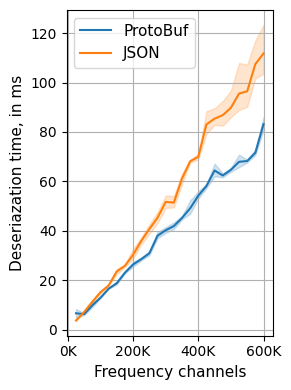

In [86]:
fig = plt.figure(figsize=(3, 4), tight_layout=True)

p = sns.lineplot(data=df_dec, x="Channel", y="Time", hue="Encoding")

p.set_xlabel("Frequency channels", fontsize=11)
p.set_ylabel(f"Deseriazation time, in ms", fontsize=11)

# Format the xticks
xlabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_xticks()/1000]
p.set_xticklabels(xlabels)

plt.grid()
plt.legend(fontsize=11)

plt.show()

### Plot Transmission Time

In [70]:
idx = 0
_df = []

for _, channel in enumerate(channels):
    for itr in range(num_iter):
        
        d1 = {
            "Channel": channel,
            "Itr": itr,
            "Time": protobuf_transmission_time[idx] / 1000, # ms -> sec
            "Encoding": "ProtoBuf",
        }
        _df.append(d1)

        
        d2 = {
            "Channel": channel,
            "Itr": itr,
            "Time": json_transmission_time[idx] / 1000, # ms -> sec
            "Encoding": "JSON",
        }
        _df.append(d2)

        idx += 1
        
df_trans = pd.DataFrame(_df)


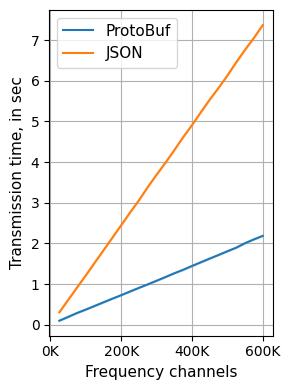

In [87]:
fig = plt.figure(figsize=(3, 4), tight_layout=True)

p = sns.lineplot(data=df_trans, x="Channel", y="Time", hue="Encoding")

p.set_xlabel("Frequency channels", fontsize=11)
p.set_ylabel(f"Transmission time, in sec", fontsize=11)

# Format the xticks
xlabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_xticks()/1000]
p.set_xticklabels(xlabels)

plt.grid()
plt.legend(fontsize=11)

plt.show()

## Browser Performance

- In `visualisation/src/lib/spectrum-plot-svg.ts` enable/disable CF plot function: `this.drawConfidenceIntervals(data);`

- Start performance recording at browser inspector 
- Send Protobuf payloads to browser

In [ ]:
r = range(20000, 220000, 20000)

In [ ]:
await producer.start(); 
sleep(2); print(f"started"); count = 1;

for channel in r:
    payload, _ = payload_generator.spectrum_protobuf(channel)
    res = await producer.produce(payload, f'{Protocol.PROTOBUF}_{MessageTopic.SPECTRUM}')
    
    print(f"counter = {count}"); count += 1; sleep(1)
    
print(f"stop")
await producer.stop()